In [33]:
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

In [34]:
# reading the data file
def read_data():
    data=pd.read_csv("C:/Top/iphone_purchase_records.csv ")
    return data

   Gender  Age  Salary  Purchase Iphone
0    Male   19   19000                0
1    Male   35   20000                0
2  Female   26   43000                0
3  Female   27   57000                0
4    Male   19   76000                0


In [35]:
# copying the data
data.copy()
data

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [36]:
data.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [38]:
data.shape

(400, 4)

In [39]:
import matplotlib.pyplot as plt
from collections import defaultdict
data.corr(numeric_only  = True)

,Age,Salary,Purchase Iphone
Age,1.000000,0.155238,0.622454
Salary,0.155238,1.000000,0.362083
Purchase Iphone,0.622454,0.362083,1.000000


In [40]:
##Exploratory Data Analysis

<Axes: >

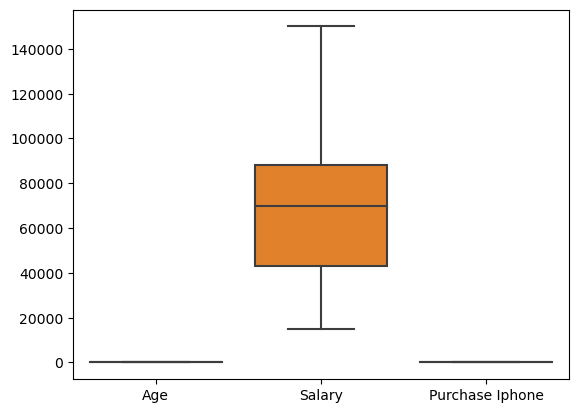

In [41]:
#outliers
sns.boxplot(data)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Salary'}>],
       [<Axes: title={'center': 'Purchase Iphone'}>, <Axes: >]],
      dtype=object)

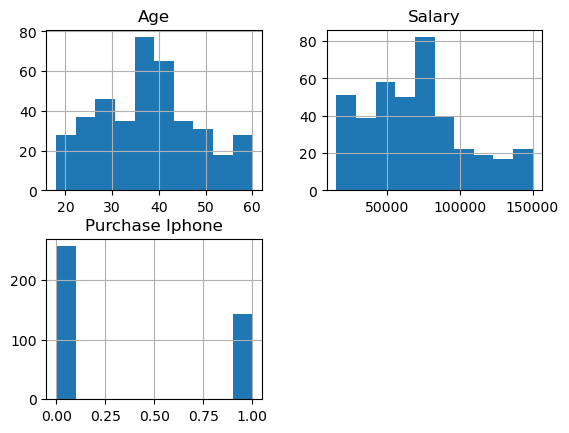

In [42]:
data.hist()

Text(0.5, 1.0, 'Salary vs Age')

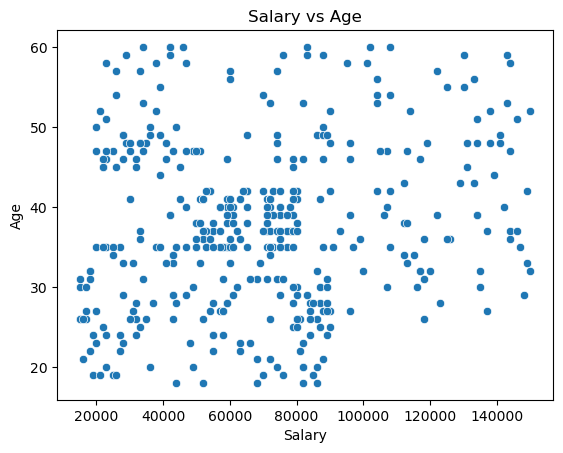

In [43]:
sns.scatterplot(data=data, x='Salary', y='Age')
plt.title('Salary vs Age')

In [48]:
d = defaultdict(LabelEncoder)
data = data.apply(lambda lb: d[lb.name].fit_transform(lb))

x=data.iloc[::,0:3]
y = data.iloc[::,3]
# sampling of data--
def train_test(x,y,test_size):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=1234)
    for i in x_train,x_test,y_train,y_test:
        print(i.shape)
    return x_train,x_test,y_train,y_test
x_train,x_test,y_train,y_test=train_test(x,y,0.2)

(320, 3)
(80, 3)
(320,)
(80,)


# Decision Tree Classifier

In [50]:
model = DecisionTreeClassifier()
model_train = model.fit(x_train,y_train)
pred = model_train.predict(x_test)

In [51]:
pred

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [52]:
accuracy_score(y_test,pred)

0.8625